In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Generate data (manual)

In [2]:
def generate_data(num_samples = 1000, sequance_length=20):
    X = np.random.rand(num_samples, sequance_length, 1) # 1 to convert the X to 3xshaped object

    y = np.sum(X, axis = 1)

    return X, y 

In [3]:
X, y = generate_data()

In [4]:
X.shape

(1000, 20, 1)

# Split the Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model

In [6]:
model = Sequential()

model.add(Conv1D(filters=64, kernel_size= 3, activation= "relu", input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size= 3, activation= "relu"))
model.add(Flatten())
model.add(Dense(64, activation ="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation ="linear"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 64)            12352     
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 78273 (305.75 KB)
Trainable params: 78273

# Train the model

In [7]:
model.compile(optimizer="adam", loss ="mse")

In [8]:
EPOCHS = 500 # 1000 will be better

history = model.fit(X_train, y_train, epochs= EPOCHS, validation_split= 0.2, verbose = 0)


# Evaluate the model

In [9]:
evaluation = model.evaluate(X_test, y_test)

print(evaluation)

7/7 [==============================] - 0s 3ms/step - loss: 0.0368
0.036793168634176254


# Predictions

In [10]:
predictions = model.predict(X_test)


7/7 [==============================] - 0s 2ms/step


# Plot the orginal and predictions with 5 Epochs

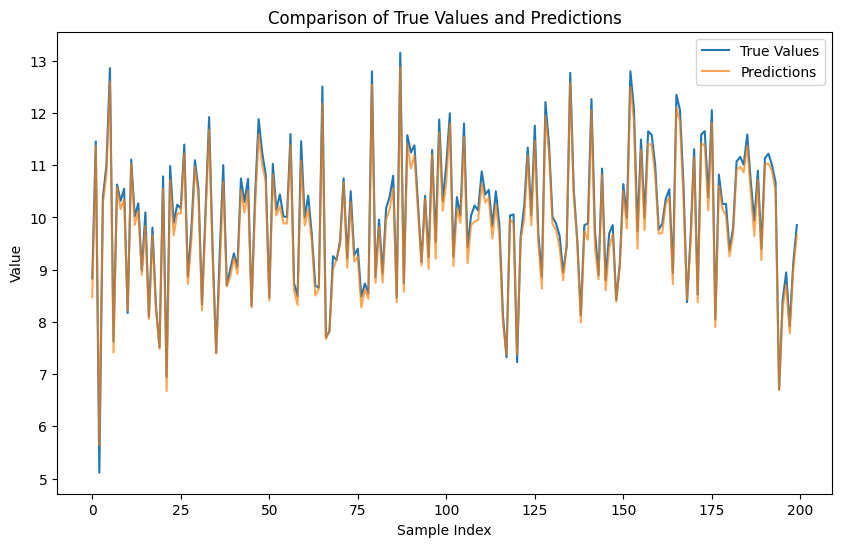

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predictions', alpha=0.7)
plt.title('Comparison of True Values and Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()